#**Demostração - Aula 5**

Ativar sessão com GPU (TPU - T4)

Até aqui vimos como usar **word embeddings generativos** (pré-treinados) focando em análise de similaridade e manuseio do espaço vetorial de alguns algoritmos como Word2Vec.

E se tentarmos usar essa "inteligència" para resolver nosso problema de classificação?

###**Análise com skip-gram em Português**

In [1]:
# Instalação do pacote Gensim e dependência
!pip install gensim==4.3.2 scipy==1.10.1 numpy==1.26.4 --quiet

Obs.: pode ser necessário reiniciar a sessão e executar a instalação novamente.

In [2]:
import gensim
print(gensim.__version__)

4.3.2


Download Word Embeddings Pré-treinadas em Portugûes (skip-gram)
- Repositório original: http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc

In [3]:
# Download do arquivo no repositório do professor
!wget 'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/skip_s300.zip'

# Descompactação do arquivo
!unzip 'skip_s300.zip' # subistitua com nome do arquivo

# Load do modelo pelo Gensimn
from gensim.models import KeyedVectors

model_skip = KeyedVectors.load_word2vec_format('skip_s300.txt')
model_skip

--2025-05-28 16:32:37--  https://dados-ml-pln.s3-sa-east-1.amazonaws.com/skip_s300.zip
Resolving dados-ml-pln.s3-sa-east-1.amazonaws.com (dados-ml-pln.s3-sa-east-1.amazonaws.com)... 3.5.234.34, 52.95.163.122, 3.5.232.154, ...
Connecting to dados-ml-pln.s3-sa-east-1.amazonaws.com (dados-ml-pln.s3-sa-east-1.amazonaws.com)|3.5.234.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 958619745 (914M) [application/zip]
Saving to: ‘skip_s300.zip’

skip_s300.zip       100%[===================>] 914.21M  19.0MB/s    in 50s     

2025-05-28 16:33:28 (18.2 MB/s) - ‘skip_s300.zip’ saved [958619745/958619745]

Archive:  skip_s300.zip
  inflating: skip_s300.txt           


In [4]:
!ls -la

total 3529584
drwxr-xr-x 1 root root       4096 May 28 16:33 .
drwxr-xr-x 1 root root       4096 May 28 16:29 ..
drwxr-xr-x 4 root root       4096 May 23 13:38 .config
drwxr-xr-x 1 root root       4096 May 23 13:39 sample_data
-rw-r--r-- 1 root root 2655642222 Oct  4  2018 skip_s300.txt
-rw-r--r-- 1 root root  958619745 Nov 30  2023 skip_s300.zip


Load do Word2Vec com CBOW
```
# Download do arquivo no repositório do professor
!wget 'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/cbow_s300.zip'

# Descompactação do arquivo
!unzip 'cbow_s300.zip' # subistitua com nome do arquivo

# Load do modelo pelo Gensim
from gensim.models import KeyedVectors

model_cbow = KeyedVectors.load_word2vec_format('cbow_s300.txt')
```

In [5]:
model_skip

Análise de similaridade

In [6]:
model_skip.similarity('maçã', 'uva')

0.6507031

In [7]:
model_skip.similarity('maçã', 'carro')

0.074699655

In [8]:
pairs = [
    ('carro', 'jipe'),
    ('carro', 'avião'),
    ('carro', 'bicicleta'),
    ('carro', 'cereal'),
    ('carro', 'filosofia'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model_skip.similarity(w1, w2)))

'carro'	'jipe'	0.71
'carro'	'avião'	0.50
'carro'	'bicicleta'	0.55
'carro'	'cereal'	0.08
'carro'	'filosofia'	-0.01


In [9]:
model_skip.most_similar(positive=['carro', 'jipe'], topn=3)

[('furgão', 0.7599552273750305),
 ('caminhão', 0.7516525387763977),
 ('veículo', 0.7478904724121094)]

In [10]:
model_skip.doesnt_match(['fogo', 'água', 'terra', 'mar', 'ar', 'carro'])

'carro'

In [11]:
model_skip.most_similar(positive=['rainha', 'homem'], negative=['mulher'], topn=3)

[('rei', 0.5894271731376648),
 ('monarca', 0.49123090505599976),
 ('guardião', 0.46204233169555664)]

In [12]:
model_skip.most_similar(positive=['rei', 'mulher'], negative=['homem'], topn=10)

[('rainha', 0.660095751285553),
 ('consorte', 0.6526049375534058),
 ('esposa', 0.6504772305488586),
 ('sobrinha', 0.6446163654327393),
 ('princesa', 0.6398769617080688),
 ('filha', 0.6342788338661194),
 ('rainha-viúva', 0.6339502334594727),
 ('primogénita', 0.6332842707633972),
 ('princesa-eleitora', 0.6240091323852539),
 ('meia-irmã', 0.6229892373085022)]

In [13]:
palavras = ['um', 'dois', 'três', 'quatro', 'dez', 'onze', 'vinte', 'homem', 'mulher', 'marido', 'esposa', 'casa', 'mesa', 'cadeira']

In [14]:
from sklearn.decomposition import PCA
import numpy as np

sample_vectors = np.array([model_skip[palavra] for palavra in palavras])
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.17956795,  0.1837527 ],
       [ 1.222936  , -0.09905042],
       [ 1.4864918 , -0.12210237],
       [ 1.5300084 , -0.05887518],
       [ 1.7701346 , -0.13250108],
       [ 1.5516895 , -0.14122176],
       [ 1.7721727 , -0.26937482],
       [-0.9042844 , -0.4267661 ],
       [-1.5513339 , -0.61161876],
       [-1.490518  , -1.1370459 ],
       [-1.9972198 , -1.7354286 ],
       [-1.0187486 ,  0.332343  ],
       [-0.8883212 ,  1.6803361 ],
       [-1.3034388 ,  2.5375526 ]], dtype=float32)

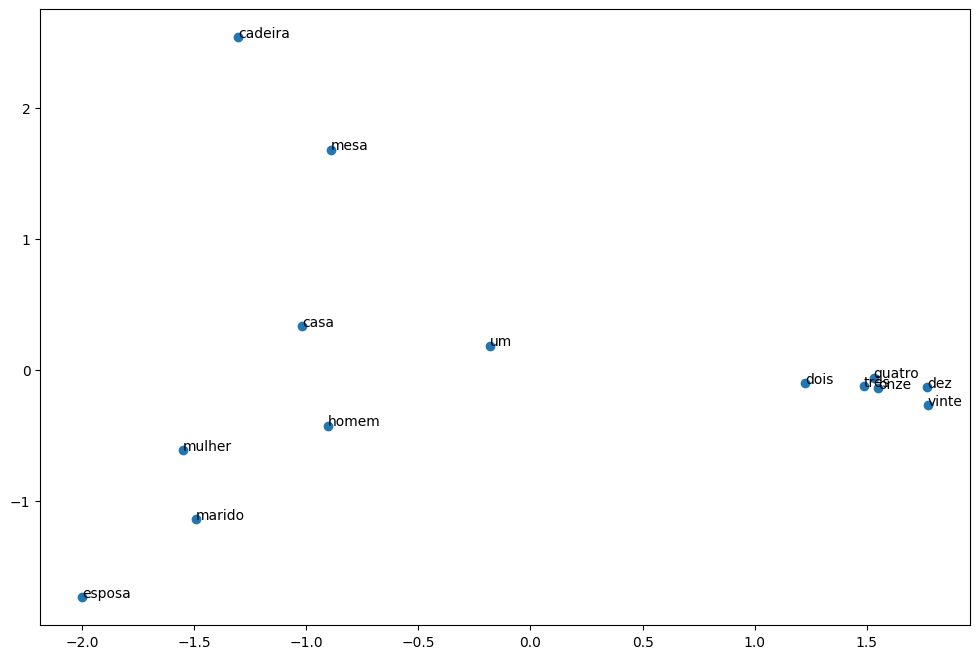

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(palavras):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

### **Feature Engineering com Embedding´s**

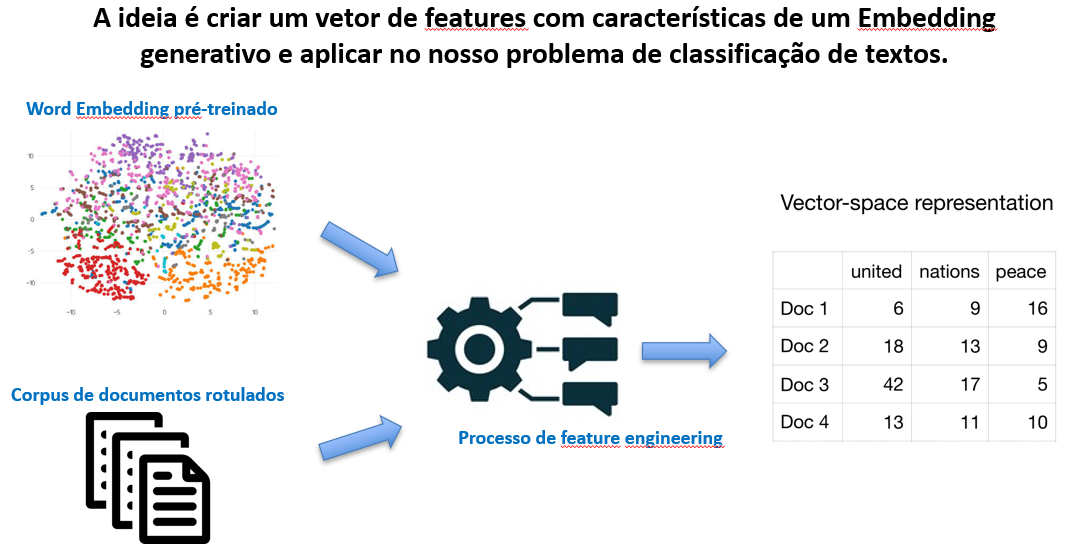

### **Classificador com word2vec**

#### Criando um Dataset com base em reviews

In [16]:
# Install Google play scraper: https://github.com/JoMingyu/google-play-scraper
# Google-Play-Scraper provides APIs to easily crawl the Google Play Store for Python without any external dependencies!
!pip install google_play_scraper --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00


In [17]:
import pandas as pd
from tqdm import tqdm
from google_play_scraper import Sort, reviews, app
import numpy as np

In [18]:
apps_ids = [
    'br.com.brainweb.ifood',
    'com.cerveceriamodelo.modelonow',
    'com.mcdo.mcdonalds',
    'habibs.alphacode.com.br',
    'com.xiaojukeji.didi.brazil.customer',
    'com.ubercab.eats',
    'com.grability.rappi',
    'burgerking.com.br.appandroid',
    'com.vanuatu.aiqfome'
    ]

In [19]:
SCORE_SAMPLES = 100
SCORE3_FACTOR = 1; TARGET_COLUMN = 'score'

#TARGET_COLUMN = 'sentiment'; SCORE3_FACTOR = 2

In [20]:
app_reviews = []

for app_id in tqdm(apps_ids):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                app_id,
                lang='pt',
                country='br',
                sort=sort_order,
                count= SCORE3_FACTOR * SCORE_SAMPLES if score == 3 else SCORE_SAMPLES,
                filter_score_with=score
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = app_id
            app_reviews.extend(rvs)

100%|██████████| 9/9 [00:28<00:00,  3.21s/it]


In [21]:
len(app_reviews)

9000

In [22]:
app_reviews[0]

{'reviewId': '00a76c33-93f8-4d82-ab4d-ef7ca9936add',
 'userName': 'Vênus Lilith',
 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWR_gO0lLK6BtW_ERe-3_yhJHKMDoA1nua7-CQbHrtItKTPNZE',
 'content': 'Não consigo utilizar a opção de pagamento na entrega pois sempre aparece como "forma de pagamento indisponível". Ou seja, é IMPOSSÍVEL pagar c dinheiro ou cartão de crédito/débito. Como era um pedido importante resolvi fazer com a única opção disponível que é o pagamento antecipado(Pix/carteira Google etc). Mas meu pedido foi cancelado pela Lj em segundos alegando estar fechada(mesmo o app mostrando como aberta). Resultado: ainda não recebi meu estorno. Sem coragem de comprar novamente.',
 'score': 1,
 'thumbsUpCount': 268,
 'reviewCreatedVersion': '10.62.0',
 'at': datetime.datetime(2025, 3, 28, 11, 28, 53),
 'replyContent': None,
 'repliedAt': None,
 'appVersion': '10.62.0',
 'sortOrder': 'most_relevant',
 'appId': 'br.com.brainweb.ifood'}

In [23]:
app_reviews_df = pd.DataFrame(app_reviews)

In [24]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,00a76c33-93f8-4d82-ab4d-ef7ca9936add,Vênus Lilith,https://play-lh.googleusercontent.com/a-/ALV-U...,Não consigo utilizar a opção de pagamento na e...,1,268,10.62.0,2025-03-28 11:28:53,None,NaT,10.62.0,most_relevant,br.com.brainweb.ifood
1,2c392c34-6da1-49c1-a185-05a20803a94a,Fabio Santana,https://play-lh.googleusercontent.com/a-/ALV-U...,"Ultimamente quase tudo no Ifood está caro, cup...",1,53,10.67.1,2025-05-06 19:03:36,None,NaT,10.67.1,most_relevant,br.com.brainweb.ifood
2,8806c2ea-8359-4cca-8196-de979c07abea,ricardo alexandre,https://play-lh.googleusercontent.com/a-/ALV-U...,"vou dar uma estrela, e é muito ainda!!! já é a...",1,76,10.66.0,2025-04-21 03:53:26,None,NaT,10.66.0,most_relevant,br.com.brainweb.ifood
3,af5a1bd6-cf7a-48f2-a96c-d3d5b2224fb7,Celes,https://play-lh.googleusercontent.com/a-/ALV-U...,"Disigne horrível, navegação também e promoções...",1,57,10.66.0,2025-04-19 15:34:06,None,NaT,10.66.0,most_relevant,br.com.brainweb.ifood
4,c9686587-086c-4303-a81e-2248cf40143f,Alexandre Maehler,https://play-lh.googleusercontent.com/a/ACg8oc...,"O aplicativo sempre funcionou bem, mas nós últ...",1,285,10.56.0,2025-02-13 23:48:16,None,NaT,10.56.0,most_relevant,br.com.brainweb.ifood


In [25]:
app_reviews_df['sentiment'] = 0
app_reviews_df.loc[app_reviews_df["score"] < 3, "sentiment"] = -1
app_reviews_df.loc[app_reviews_df["score"] > 3, "sentiment"] = 1

In [26]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment
0,00a76c33-93f8-4d82-ab4d-ef7ca9936add,Vênus Lilith,https://play-lh.googleusercontent.com/a-/ALV-U...,Não consigo utilizar a opção de pagamento na e...,1,268,10.62.0,2025-03-28 11:28:53,None,NaT,10.62.0,most_relevant,br.com.brainweb.ifood,-1
1,2c392c34-6da1-49c1-a185-05a20803a94a,Fabio Santana,https://play-lh.googleusercontent.com/a-/ALV-U...,"Ultimamente quase tudo no Ifood está caro, cup...",1,53,10.67.1,2025-05-06 19:03:36,None,NaT,10.67.1,most_relevant,br.com.brainweb.ifood,-1
2,8806c2ea-8359-4cca-8196-de979c07abea,ricardo alexandre,https://play-lh.googleusercontent.com/a-/ALV-U...,"vou dar uma estrela, e é muito ainda!!! já é a...",1,76,10.66.0,2025-04-21 03:53:26,None,NaT,10.66.0,most_relevant,br.com.brainweb.ifood,-1
3,af5a1bd6-cf7a-48f2-a96c-d3d5b2224fb7,Celes,https://play-lh.googleusercontent.com/a-/ALV-U...,"Disigne horrível, navegação também e promoções...",1,57,10.66.0,2025-04-19 15:34:06,None,NaT,10.66.0,most_relevant,br.com.brainweb.ifood,-1
4,c9686587-086c-4303-a81e-2248cf40143f,Alexandre Maehler,https://play-lh.googleusercontent.com/a/ACg8oc...,"O aplicativo sempre funcionou bem, mas nós últ...",1,285,10.56.0,2025-02-13 23:48:16,None,NaT,10.56.0,most_relevant,br.com.brainweb.ifood,-1


In [27]:
app_reviews_df['sentiment'].value_counts()

,count
sentiment,
-1,3600
1,3600
0,1800


In [28]:
df_model = app_reviews_df[['content','score','sentiment']]

In [29]:
# Normalização de texto
import string

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# lista de stopwords do NLTK
stopwords = nltk.corpus.stopwords.words('portuguese')

# função que remove pontuação
def remove_punctuation(text):
    punctuations = string.punctuation
    table = str.maketrans({key: " " for key in punctuations})
    text = text.translate(table)
    return text

# função que normaliza o texto e remove stopwords
def norm_tokenize(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = "".join([w for w in text if not w.isdigit()])
    text = word_tokenize(text)
    text = [x for x in text if x not in stopwords]
    text = [y for y in text if len(y) > 2]
    #text " ".join([t for t in text])
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [30]:
df_model['tokens'] = df_model['content'].apply(norm_tokenize)

<ipython-input-30-a8bb658abe50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['tokens'] = df_model['content'].apply(norm_tokenize)


In [31]:
df_model.head()

,content,score,sentiment,tokens
0,Não consigo utilizar a opção de pagamento na e...,1,-1,"[consigo, utilizar, opção, pagamento, entrega,..."
1,"Ultimamente quase tudo no Ifood está caro, cup...",1,-1,"[ultimamente, quase, tudo, ifood, caro, cupons..."
2,"vou dar uma estrela, e é muito ainda!!! já é a...",1,-1,"[vou, dar, estrela, ainda, segunda, vez, faço,..."
3,"Disigne horrível, navegação também e promoções...",1,-1,"[disigne, horrível, navegação, promoções, pra,..."
4,"O aplicativo sempre funcionou bem, mas nós últ...",1,-1,"[aplicativo, sempre, funcionou, bem, últimos, ..."


In [32]:
# Exemplo 1: Função para obter embeddings médios para cada texto
vectorizer = model_skip

def average_vector(tokens):
    vector_size = vectorizer.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for word in tokens:
        if word in vectorizer:
            ctr += 1
            wv_res += vectorizer[word]
    wv_res = wv_res/ctr
    return wv_res

#vectorizer['maquiagem']

In [33]:
# Exemplo 2: Função para obter embeddings médios para cada texto
'''
vectorizer = model_skip

def average_vector(words):
  vectors = [vectorizer[word] for word in words if word in vectorizer]
  if vectors:
    return sum(vectors) / len(vectors)
  else:
    vector_size = vectorizer.vector_size
    wv_res = np.zeros(vector_size)
    return wv_res
'''

'\nvectorizer = model_skip\n\ndef average_vector(words):\n  vectors = [vectorizer[word] for word in words if word in vectorizer]\n  if vectors:\n    return sum(vectors) / len(vectors)\n  else:\n    vector_size = vectorizer.vector_size\n    wv_res = np.zeros(vector_size)\n    return wv_res\n'

In [34]:
# Tokenizar e obter embeddings médios para cada texto
df_model['vector'] = df_model['tokens'].apply(average_vector)

<ipython-input-34-e1e7b11c2590>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['vector'] = df_model['tokens'].apply(average_vector)


In [35]:
#df_model['vector'][0]

In [36]:
df_model.head()

,content,score,sentiment,tokens,vector
0,Não consigo utilizar a opção de pagamento na e...,1,-1,"[consigo, utilizar, opção, pagamento, entrega,...","[0.02869663126361759, -0.056313781482774924, -..."
1,"Ultimamente quase tudo no Ifood está caro, cup...",1,-1,"[ultimamente, quase, tudo, ifood, caro, cupons...","[-0.017724334035139892, 0.016495222998653643, ..."
2,"vou dar uma estrela, e é muito ainda!!! já é a...",1,-1,"[vou, dar, estrela, ainda, segunda, vez, faço,...","[-0.02211865014396608, -0.0684307242743671, -0..."
3,"Disigne horrível, navegação também e promoções...",1,-1,"[disigne, horrível, navegação, promoções, pra,...","[-0.028950500444625504, -0.07825767648464535, ..."
4,"O aplicativo sempre funcionou bem, mas nós últ...",1,-1,"[aplicativo, sempre, funcionou, bem, últimos, ...","[0.017615938858528222, -0.014666019741692866, ..."


In [37]:
x = df_model['vector'].to_list()
y = df_model[TARGET_COLUMN].to_list()

In [38]:
len(x[0])

300

In [39]:
from sklearn.model_selection import train_test_split
# divisão da amostra entre treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state = 42)

#### Treina modelo

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# treinamento do modelo ávore de decisão com o dataframe de treino
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# escoragem da classificação na amostra de teste
y_pred = model.predict(x_test)

In [41]:
# Avaliação do modelo

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.56      0.51       540
           2       0.36      0.37      0.36       540
           3       0.40      0.35      0.37       540
           4       0.39      0.34      0.36       540
           5       0.59      0.62      0.61       540

    accuracy                           0.45      2700
   macro avg       0.44      0.45      0.44      2700
weighted avg       0.44      0.45      0.44      2700

0.4462962962962963


#### Comprando o resultado com vetorização Bag of Words

In [42]:
def token_to_text(tokens):
    return " ".join(tokens)

df_model['norm_content'] = df_model['tokens'].apply(token_to_text)

<ipython-input-42-12ec7bc66d6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['norm_content'] = df_model['tokens'].apply(token_to_text)


In [43]:
df_model.head()

,content,score,sentiment,tokens,vector,norm_content
0,Não consigo utilizar a opção de pagamento na e...,1,-1,"[consigo, utilizar, opção, pagamento, entrega,...","[0.02869663126361759, -0.056313781482774924, -...",consigo utilizar opção pagamento entrega pois ...
1,"Ultimamente quase tudo no Ifood está caro, cup...",1,-1,"[ultimamente, quase, tudo, ifood, caro, cupons...","[-0.017724334035139892, 0.016495222998653643, ...",ultimamente quase tudo ifood caro cupons falso...
2,"vou dar uma estrela, e é muito ainda!!! já é a...",1,-1,"[vou, dar, estrela, ainda, segunda, vez, faço,...","[-0.02211865014396608, -0.0684307242743671, -0...",vou dar estrela ainda segunda vez faço cancela...
3,"Disigne horrível, navegação também e promoções...",1,-1,"[disigne, horrível, navegação, promoções, pra,...","[-0.028950500444625504, -0.07825767648464535, ...",disigne horrível navegação promoções pra algum...
4,"O aplicativo sempre funcionou bem, mas nós últ...",1,-1,"[aplicativo, sempre, funcionou, bem, últimos, ...","[0.017615938858528222, -0.014666019741692866, ...",aplicativo sempre funcionou bem últimos meses ...


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df_train, df_test = train_test_split(
      df_model,
      test_size = 0.3,
      random_state = 42
  )

vect = CountVectorizer()
vect.fit(df_train.norm_content)
x_train = vect.transform(df_train.norm_content)
x_test = vect.transform(df_test.norm_content)
y_train = df_train[TARGET_COLUMN]
y_test = df_test[TARGET_COLUMN]

# treinamento do modelo ávore de decisão com o dataframe de treino
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# escoragem da classificação na amostra de teste
y_pred = model.predict(x_test)

In [45]:
# Avaliação do modelo

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.66      0.58       558
           2       0.45      0.34      0.39       535
           3       0.43      0.40      0.41       526
           4       0.47      0.39      0.43       559
           5       0.58      0.69      0.63       522

    accuracy                           0.50      2700
   macro avg       0.49      0.50      0.49      2700
weighted avg       0.49      0.50      0.49      2700

0.4962962962962963


In [46]:
x_train.shape

(6300, 10204)

### **Classificador com Transformers**

Referências/documentações:
- [Paper **"Attention Is All You Need"**](https://arxiv.org/pdf/1706.03762)
- [Documentação Hugging Face](https://huggingface.co/docs)
- [Modulo sentence-transformers e modelo de linguagem da Hugging Face](https://huggingface.co/sentence-transformers/distiluse-base-multilingual-cased-v2)


#### Sentence transformers

O Sentence-Transformers é uma biblioteca construída sobre o framework Transformers, e foi projetada para a geração de representações semânticas de sentenças (documentos ou pedaços de texto) de alta qualidade.

Vamos utilizar o modelo 'distiluse-base-multilingual-cased-v2', que é um modelo da família DistilBERT (uma versão mais leve e eficiente do BERT) que foi pré-treinado especificamente para a geração de embeddings de sentenças multilíngues.

In [47]:
!pip install sentence-transformers==3.2.1 transformers==4.46.3 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 779.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [48]:
import sentence_transformers
print(sentence_transformers.__version__)

/usr/local/lib/python3.11/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


3.2.1


In [49]:
from sentence_transformers import SentenceTransformer

st = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')
review_embeddings = st.encode(df_model['content'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [50]:
len(review_embeddings[0])

512

In [51]:
x = review_embeddings
y = df_model[TARGET_COLUMN].to_list()

In [52]:
from sklearn.model_selection import train_test_split
# divisão da amostra entre treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state = 42)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# treinamento do modelo ávore de decisão com o dataframe de treino
log_reg = RandomForestClassifier(random_state=42)
log_reg.fit(x_train, y_train)

# escoragem da classificação na amostra de teste
y_pred = log_reg.predict(x_test)

In [54]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      0.59      0.53       540
           2       0.41      0.39      0.40       540
           3       0.43      0.40      0.41       540
           4       0.44      0.42      0.43       540
           5       0.65      0.63      0.64       540

    accuracy                           0.49      2700
   macro avg       0.49      0.49      0.48      2700
weighted avg       0.49      0.49      0.48      2700

0.4866666666666667


## ***Exercício***

Você deverá treinar o modelo de classificação do dataset de produtos [1] utilizando as duas abordagens apresentadas aqui (embeddings word2vec (CBOW ou Skip-gram) e sentence transformer e comparar os resultados.

*   Remover registros com valores nulos;
*   Contatenar as colunas de nome e descrição;
*   Aplicar normalização da demo;
*   Amostra de 30% para teste e random_state = 42.


[1] https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

In [55]:
# resposta

In [ ]:
# Dica, transformar em lista
'''
vetor_embedding = st.encode(df['texto'].to_list())
df['vetor_st'] = list(vetor_embedding)
x_train = df_train['vetor_st'].to_list()
y_train = df_train['categoria'].to_list()
'''

#***O que você achou da aula de hoje?***

Pelo aplicativo da FIAP ou pelo site

(Entrar no FIAP, e no menu clicar em Experience Survey)

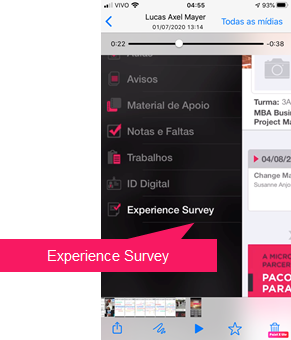